In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
assets_dir = '../Assets/'

In [55]:
def padding(img, kernel, center=None):
    # center type : tuple (y, x)
    if center is None:
        center = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    
    top = center[0]
    bottom = kernel.shape[0] - center[0] - 1
    left =  center[1]
    right = kernel.shape[1] - center[1] - 1

    # print(f'Padding sizes - top: {top}, bottom: {bottom}, left: {left}, right: {right}')
    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT)
    return padded_img

In [56]:
def convolve2d(img, kernel, center=None, flip_kernel=True):
    if flip_kernel:
        kernel = np.flip(kernel)

        if center is not None:
            center = (kernel.shape[0] - center[0] - 1, kernel.shape[1] - center[1] - 1)

    padded_img = padding(img, kernel, center)
    
    output_height, output_width = img.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros((output_height, output_width), dtype=np.float32)
    
    for i in range(output_height):
        for j in range(output_width):
            region = padded_img[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [57]:
gaussian_kernel = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
], dtype=np.float32)
gaussian_kernel /= np.sum(gaussian_kernel)

sobel_X = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
], dtype=np.float32)

sobel_Y = sobel_X.T

In [58]:
img = cv2.imread(assets_dir + 'generic/Lena.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
blurred_img = convolve2d(img, gaussian_kernel)

img2 = cv2.imread(assets_dir + 'generic/box.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
edge_Y = convolve2d(img2, sobel_Y)
edge_X = convolve2d(img2, sobel_X)

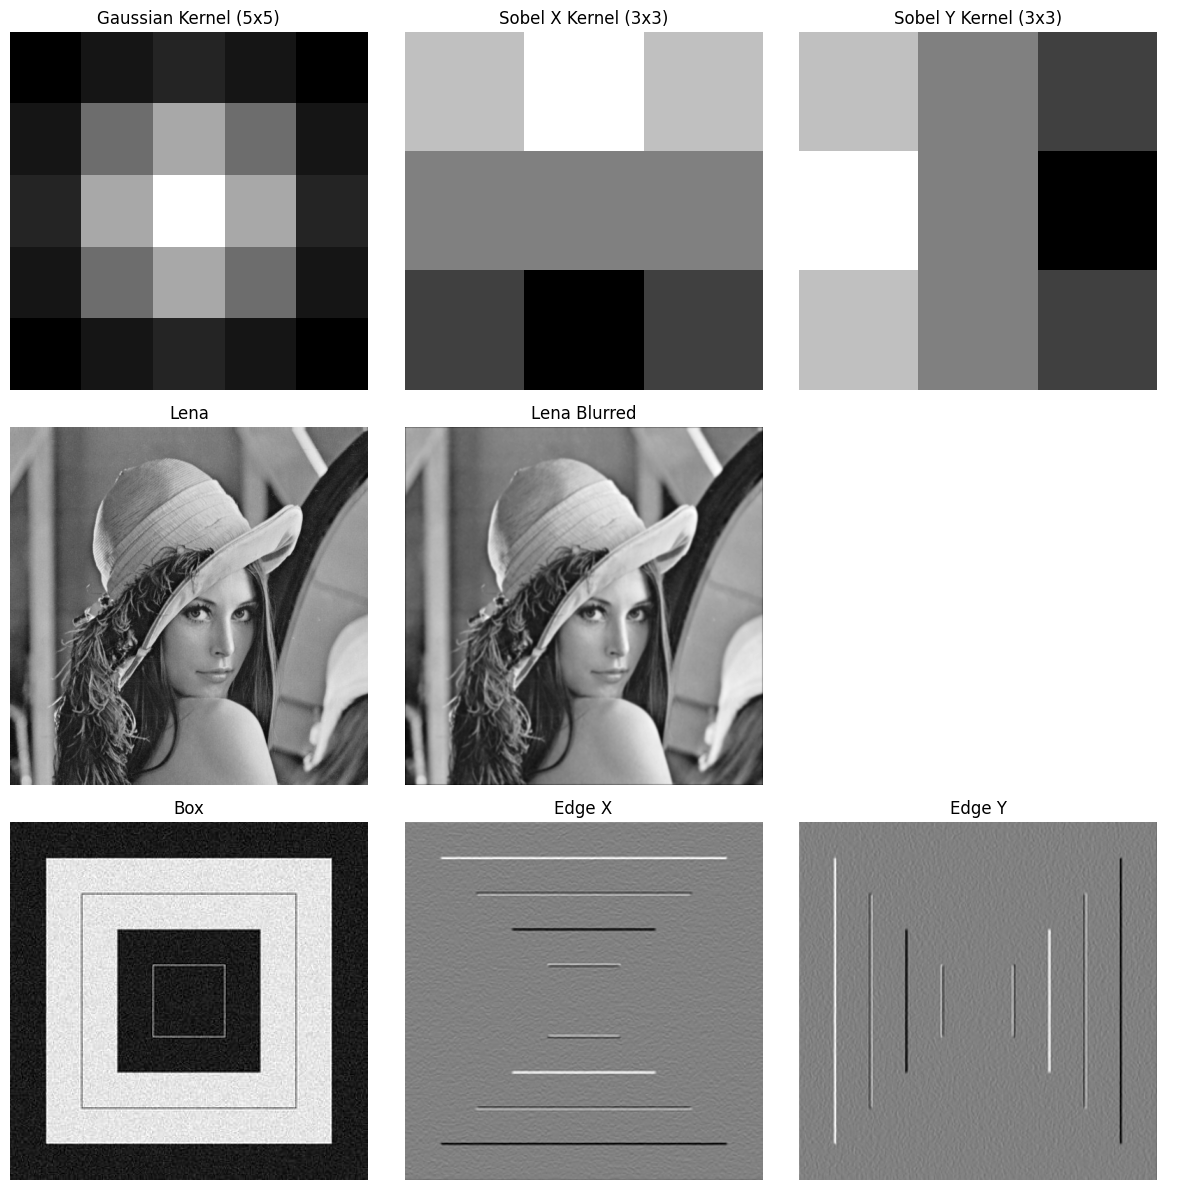

In [59]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs[0, 0].imshow(gaussian_kernel, cmap='gray')
axs[0, 0].set_title('Gaussian Kernel (5x5)')
axs[0, 1].imshow(sobel_X, cmap='gray')
axs[0, 1].set_title('Sobel X Kernel (3x3)')
axs[0, 2].imshow(sobel_Y, cmap='gray')
axs[0, 2].set_title('Sobel Y Kernel (3x3)')

axs[1, 0].imshow(img, cmap='gray')
axs[1, 0].set_title('Lena')
axs[1, 1].imshow(blurred_img, cmap='gray')
axs[1, 1].set_title('Lena Blurred')

axs[2, 0].imshow(img2, cmap='gray')
axs[2, 0].set_title('Box')
axs[2, 1].imshow(edge_X, cmap='gray')
axs[2, 1].set_title('Edge X')
axs[2, 2].imshow(edge_Y, cmap='gray')
axs[2, 2].set_title('Edge Y')

for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()